In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from soft_eng_req import *

In [2]:
print(model)

ResNet (
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
  (relu): ReLU (inplace)
  (maxpool): MaxPool2d (size=(3, 3), stride=(2, 2), padding=(1, 1), dilation=(1, 1))
  (layer1): Sequential (
    (0): BasicBlock (
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
      (relu): ReLU (inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
    )
    (1): BasicBlock (
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
      (relu): ReLU (inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d

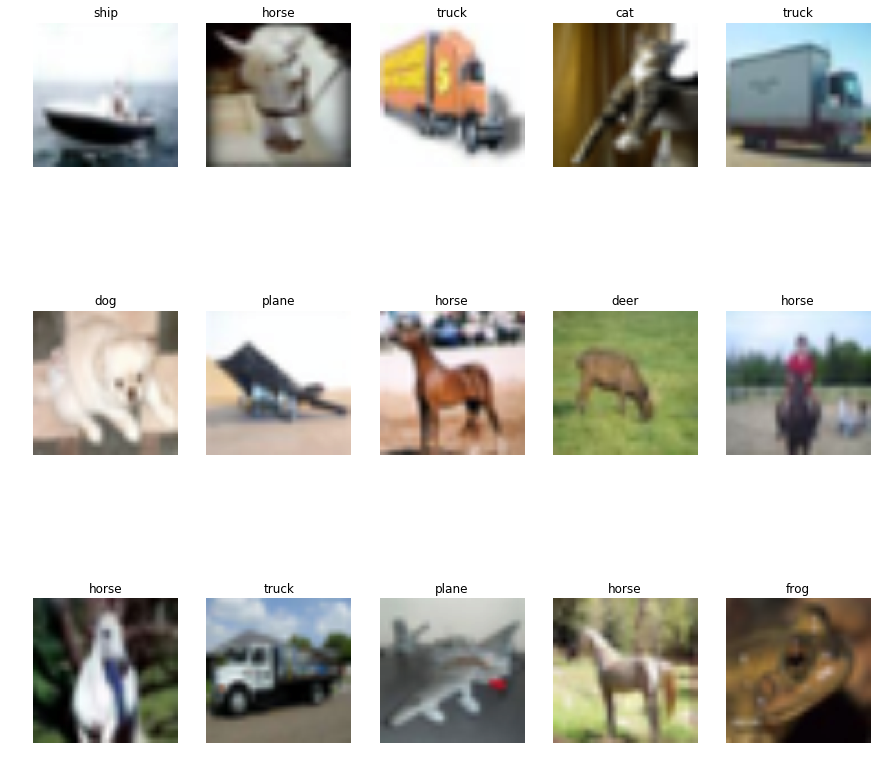

In [3]:
plt.rcParams['figure.figsize'] = (15.0, 15.0)
f, ax = plt.subplots(nrows=3, ncols=5)
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
im_samples = []

for row in range(3):
    for i, j in enumerate(np.sort(np.random.randint(0, len(tstset), size=5))):
        im = tstset[j][0].numpy().transpose((1, 2, 0))
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        inp = std * im + mean
        label = classes[tstset[j][1]]
        im_samples.extend([j])
        ax[row, i].axis('off')
        ax[row, i].set_title(label, loc='center')
        ax[row, i].imshow(inp)

In [4]:
a = torch.zeros((15, 3, 224, 224))
for i, j in enumerate(im_samples):
    a[i] = tstset[j][0]
inp = torch.Tensor(a)
inp = Variable(inp)
model.train(False)
print("!!")
outputs = model(inp)
_, preds = torch.max(outputs.data, 1)

!!


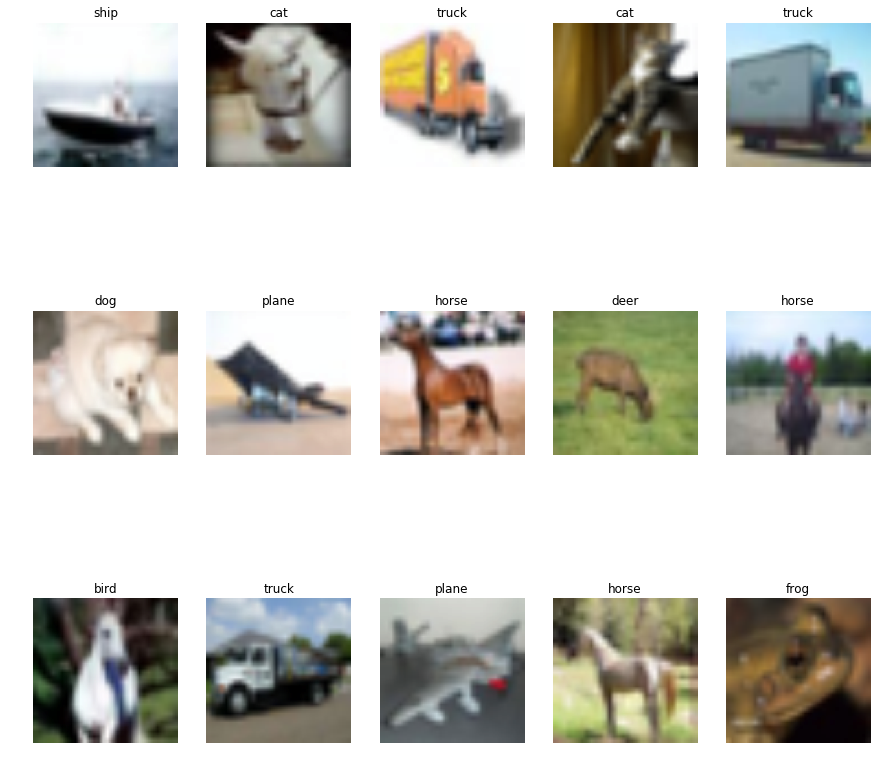

In [5]:
plt.rcParams['figure.figsize'] = (15.0, 15.0)
f, ax = plt.subplots(nrows=3, ncols=5)
l = 0 
for row in range(3):
    for i, j in enumerate(im_samples[l:l+5]):
        im = tstset[j][0].numpy().transpose((1, 2, 0))
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        inp = std * im + mean
        label = classes[preds[l+i][0]]
        ax[row, i].axis('off')
        ax[row, i].set_title(label, loc='center')
        ax[row, i].imshow(inp)
    l+=5